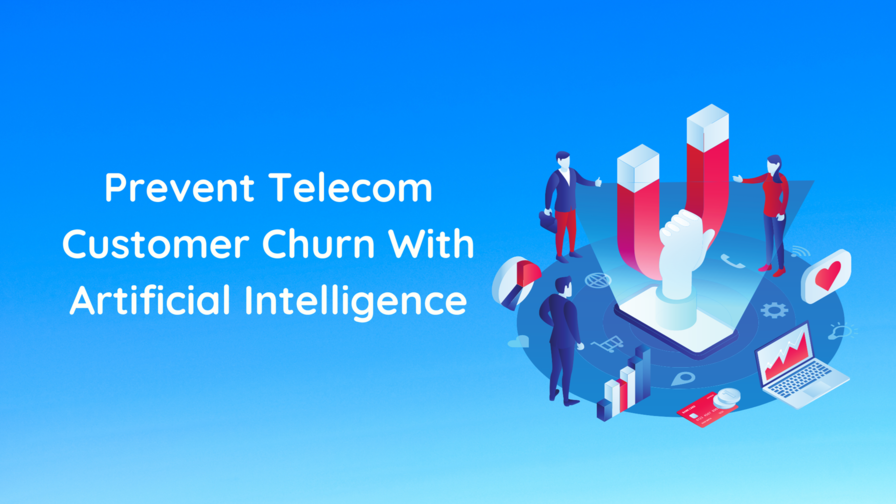

Hello my name is Rochith and this is my ML Churn project on Telecome. Customer churn is one of the most critical challenges faced by telecom companies, as retaining existing customers is often more cost-effective than acquiring new ones. In this project, I developed a machine learning model to predict customer churn using historical telecom usage and demographic data.
The project involved data preprocessing, exploratory data analysis (EDA), feature engineering, and building predictive models using Logistic Regression and Random Forest. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('churn-bigml-80.csv')
test = pd.read_csv('churn-bigml-20.csv')

In [ ]:
pd.isnull(train).sum()

The above code shows that there are no missing values present in the csv file read, and that we can safely proceed with analysing data.

In [ ]:
train.describe()

In [ ]:
train.head()

The describe and the head function of pandas provide insights of the data which is the first step in any Machine Learning project, to get ourselves familaried with the data. Next we will be visualising data and selecting "Features" for our machine learning Model.

In [ ]:
print(train.dtypes)

This represents all the coulmns along with their datatypes present in our dataset and we can choose the features (inputs) for our machine learning model through these columns and one column from them will be our target variable (output).

In [ ]:
y = train.Churn
y.value_counts()

In [ ]:
import seaborn as sns
sns.countplot(x='Churn',data=train,hue='Churn')

Chrun will act as our target variable and we check if there is any imbalance in the data. Visually seeing the graph of Chrun we can tell that there does exists an imbalance. Next we will see how to prepare data to be fed into model through a phase called EDA(Exploratory Data Analysis)

In [ ]:
numeric_cols = train.select_dtypes(['int64','float64']).columns
print(numeric_cols)
print(len(numeric_cols))

In [ ]:
rows=4
cols=4

In [ ]:
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes = axes.flatten()
for i,col in enumerate(numeric_cols):
    sns.kdeplot(
        data=train,
        x=col,
        hue="Churn",
        fill=True,
        alpha=0.2,
        common_norm=False,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Churn", fontsize=12)
plt.tight_layout()
plt.show()

The above is a KDE(Kernel Density Estimate) for all the columns in our dataset that satisfies condition of datatype being int64 or float64. This is a very crucial step for feature selection for our model. We select the features where the blue(Churn=False) and orange(Churn=True) graph are clearly different from each other as it will help our model predict right. If we were to select graphs where the overlapping isn't as clear then model wouldn't be able to predict why few customers churn where as few don't.
"THIS IS A VERY IMPORTANT STEP(PROCEEDING WITHOUT UNDERSTANDING THIS IS OF NO USE)".

In [ ]:
sns.countplot(
    data=train,
    x='International plan',
    hue='Churn'
)
sns.countplot(
    data=train,
    x='Voice mail plan',
    hue='Churn',
)
plt.xlabel("Internation plan            Voice mail plan")

In [ ]:
train['International plan']=train['International plan'].apply(lambda x:1 if x=='Yes' else 0)
train['Voice mail plan']=train['Voice mail plan'].apply(lambda x:1 if x=='Yes' else 0)
test['International plan']=test['International plan'].apply(lambda x:1 if x=='Yes' else 0)
test['Voice mail plan']=test['Voice mail plan'].apply(lambda x:1 if x=='Yes' else 0)

In [ ]:
features=['Total day minutes','Total eve minutes','Total intl minutes','Customer service calls','International plan','Voice mail plan']
print(train[features].columns)
y_train=train.Churn
y_test=test.Churn

In [ ]:
X_train=train[features]
X_test=test[features]

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
X_train= scale.fit_transform(X_train)
X_test= scale.transform(X_test)

Until now we have preprocessed the data and seprated them into training and testing data for our model. We have to scale data to have similar scales(mean and standar deviation) orelse the large-scale feature can dominate distance-based or gradient-based computations. For example consider 

Feature 	   Values
Age	           20–60
Salary	    30,000–150,000
0Without scaling the model might mostly rely on Salary differences, ignoring Age, because salary values are much larger numerically. 
With StandardScaler, both features get similar weight in distance calculation.
Next we move on to the most excited phase of machine learning: "BUILDING THE ML MODEL". |


In [ ]:
X_train=pd.DataFrame(X_train,columns=features)
X_test=pd.DataFrame(X_test,columns=features)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
my_model= LogisticRegression(random_state=0)
my_model.fit(X_train,y_train)
print("Logistic Regression model trained successfully,Model fit with training data")
preds=my_model.predict(X_test)
mae= mean_absolute_error(preds,y_test)
print("The MAE value of the model trained is:"+str(mae))

In [ ]:
accuracy= accuracy_score(y_test, preds)
print(f"Model accuracy:{accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, preds, target_names=['No Churn(0)','Churn (1)']))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, preds)
print(cm)


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png')
print("\nConfusion matrix plot saved as 'confusion_matrix.png'")

The image we have obtained above is called the confusion matrix. It has four quadrants which signify some meaning to the values.
True Positive(Bottom Right)-"Model predicted churn, and actually they did churn" the value comes out to be 15 and is the most valuable type of prediction for business, basically these are churners correctly flagged.
True Negative(Top Left)-"The model predicted they would not churn and they did not churn" the value comes out to be 550. It signifies that these customer base is safe and correctly left them alone
False Positive(Top Right)-"Predicted they would churn, but turned out they did not churned" the value comes out to be 22. It is a false alarm, you targeted these customers with retention actions unnecessarily.
False Negative(Bottom Left)-"Predicted they would not churn, but churned". the value comes out to be 80. It is too late to intervene and have lost the customers.

Next we will try to increase our prediction accuracy from 84 to 90+. To do this we will use RandomForestClassifiers and the concept of Pipelines which comes under advanced machine learning modeling techniques. We will also include OneHotEncoder for categorical variables. Because there is no missing value in numerical features we will skip using Imputers for this project.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
train_df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')
combine_df = pd.concat([train_df,test_df],ignore_index=True)
combine_df['Churn'] = combine_df['Churn'].astype(int)
X = combine_df.drop(columns=['State','Churn','Area code',
                            'Total day charge','Total eve charge','Total night calls',
                            'Total intl charge'])
y= combine_df.Churn
X_train, X_val, y_train, y_val= train_test_split(X,y,random_state=42)
numerical_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

We have read the data from the seprate train and test csv files and combined them for consistency in results. Later we have split them into Training and testing data. 
Why should we split the dataset into train and testing.(Find out yourself:[hint: It has to do with machine learning model's prediction accuracy] )
We have prepared the data and ready to fit it into our model and finally bundle preprocessed data and model into pipelines.

In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42
    ))
])
model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_preds, y_val)
print("Accuracy is:"+str(accuracy*100))
print("\nClassification Report:")
print(classification_report(y_val, y_preds, target_names=['No Churn', 'Churn']))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, y_preds)
print(cm)

We will now understand the meaning of these values inside Classification Report:
We observe there are 5 rows(divided into 2,3) and 4 coulmns.
The No Churn row signifies the number of customers that the model predicted who did not churn with a precision of 94%.
Recall is 1 or 100% means that the model has successfully caught all the customers who do not churn and the False Negative quadrant is 0 as we will see it in the next cell.
F1 score is the harmonic mean of both precision and recall. It has a high value of 97% due to both values being hight
Support is the actual count of number of customers that did not churn.

Same applies for Churn data. It has a lower recall value means that model catches only 62% of the churners where as the 38% are still missing and it lowers the F1scores as well. Support 113 means that there are only 113 actual churners found by the model.

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png')
print("\nPlot saved as 'confusion_matrix.png'")

Now that we know what each quadrant signifies, we see quite contrasting difference between Logistic Regression model and RandomForestClassifiers.
Let's discuss this in-detailed:(1-Previous model, 2-Current Model)
TN - 1: 550
TN - 2: 721
Higher TN count means the model correctly classifies for more No-Churn
TP - 1: 15
TP - 2: 70
Huge success as we catch holds of more churner correctly
FN - 1: 80
FN - 2: 43
FN is lower indicating the new model catching more actual churner.
FP - 1: 22
FP - 2: 0
The new model makes no false churn prediction. Very high prediction

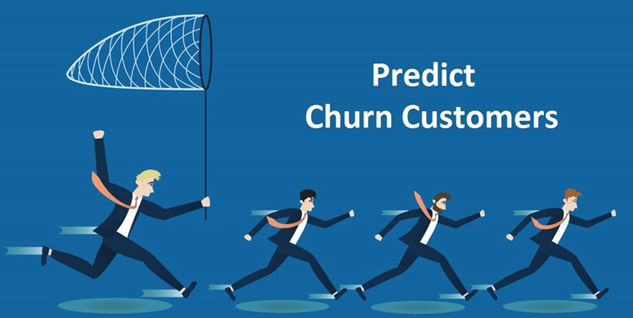

This project demonstrates how data-driven insights can empower telecom companies to address churn before it happens. By integrating predictive analytics into their customer relationship strategies, businesses can focus on targeted retention campaigns, optimize service offerings, and enhance customer loyalty.